In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy import optimize

sp.init_printing(use_unicode=True)

In [65]:
class PIP:
    def __init__(self, p, symbols, f, getSI):
        self.parameters = p
        self.symbols = symbols
        self.f = f
        self.getSI = getSI

    def getPIP(self,
        alpha_res = np.linspace(1,1.5,100),
        alpha_mut = np.linspace(1,1.5,100)):
        
        s, i = np.array([self.getSI(x) for x in alpha_res]).transpose()
        a1,a2 = np.meshgrid(alpha_res, alpha_mut)
        l = len(alpha_mut)
        s=s.repeat(l).reshape((l,l)).transpose()
        i=i.repeat(l).reshape((l,l)).transpose()

        sol = np.empty((l**2))
        for counter, (res,mut,s,i) in enumerate(zip(a1.flatten(), a2.flatten(),s.flatten(), i.flatten())):
            sol[counter] = self.f(res,mut,s,i)
        sol = sol.reshape((l,l))
        #sol = np.sign(sol)
        h = plt.contourf(alpha_res,alpha_mut, sol)
        plt.axis('scaled')
        plt.colorbar()
        plt.show()

In [57]:
p = b,d,t,c,k = 10.0, 1.0, 1.0, 1.0, 10.0
symbols = S, I = sp.symbols('S I')


def f(a_res, a_mut, S, I):
    return a_mut/(a_mut+c)*S - (d + a_mut*(1 + (I/k)) + t)

def getSI(a):
    dS = (b-d)*S + b*I - a/(a+c)*S*I + t*I
    dI = a/(a+c)*S*I -(d+a*(1+I/k)+ t)*I
    A = sp.solve([dS,dI], [S,I])
    #return A
    return [x for x in A if (x[0] > 0 and x[1] >0)][0]

def getSI2(a):
    def SI(SI):
        return[(b-d)*SI[0] + b*SI[1] - a/(a+c)*SI[0]*SI[1] + t*SI[1], a/(a+c)*SI[0]*SI[1] -(d+a*(1+SI[1]/k)+ t)*SI[1]]
    return optimize.root(SI, [1000.0,1000.0]).x


In [ ]:
model = PIP(p, symbols, f, getSI)
model.getPIP(alpha_res = np.linspace(0.1,1,50), alpha_mut = np.linspace(0.1,1,50))

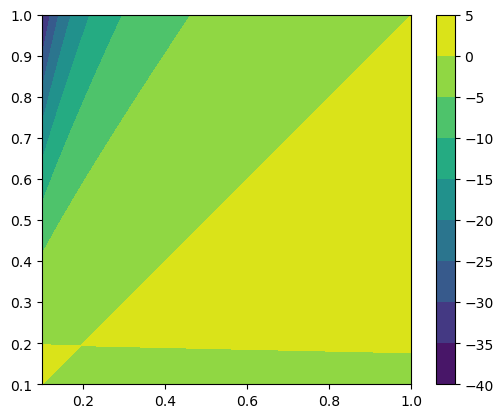

In [66]:
model = PIP(p, symbols, f, getSI2)
model.getPIP(alpha_res = np.linspace(0.1,1,1000), alpha_mut = np.linspace(0.1,1,1000))

In [67]:
s,i = getSI(0.1)
f(0.1,0.8,s,i)